In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load each CSV file
data1 = pd.read_csv('C:/Users/user/Documents/10acadamy/data/benin-malanville.csv')
data2 = pd.read_csv('C:/Users/user/Documents/10acadamy/data/sierraleone-bumbuna.csv')
data3 = pd.read_csv('C:/Users/user/Documents/10acadamy/data/togo-dapaong_qc.csv')

# Display the first five rows of each DataFrame
print("benin-malanville data:")
print(data1.head())

print("\nsierraleone-bumbuna data:")
print(data2.head())

print("\ntogo-dapaong_qc data:")
print(data3.head())


benin-malanville data:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [13]:
# Get basic information about each DataFrame
print("benin-malanville info:")
print(data1.info())

print("\nsierraleone-bumbuna info:")
print(data2.info())

print("\ntogo-dapaong_qc info:")
print(data3.info())


benin-malanville info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB 

In [14]:
# Check for Missing Values
print("benin-malanville data missing values:")
print(data1.isnull().sum())

print("\nsierraleone-bumbuna data missing values:")
print(data2.isnull().sum())

print("\ntogo-dapaong_qc data missing values:")
print(data3.isnull().sum())


benin-malanville data missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

sierraleone-bumbuna data missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         52

In [15]:
# Summary Statistics: Calculate the mean, median, standard deviation, and other statistical measures for each numeric column to understand data distribution.
print("benin-malanville data descriptive statistics:")
print(data1.describe())

print("\nsierraleone-bumbuna data descriptive statistics:")
print(data2.describe())

print("\ntogo-dapaong_qc data descriptive statistics:")
print(data3.describe())


benin-malanville data descriptive statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000      

In [16]:
# Data Understanding and Exploration (EDA)
#Data Quality Check

# Check missing values
print(" Missing values in the benin-malanville dataset:")
print(data1.isnull().sum())

print("\nMissing values in the sierraleone-bumbuna dataset:")
print(data2.isnull().sum())

print("\nMissing values in the togo-dapaong_qc dataset:")
print(data3.isnull().sum())


 Missing values in the benin-malanville dataset:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing values in the sierraleone-bumbuna dataset:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 

In [17]:
# 'Comments' colomun, is not critical: remove it.
# Drop the Comments column if it is not needed
data1 = data1.drop(columns=['Comments'])
data2 = data2.drop(columns=['Comments'])
data3 = data3.drop(columns=['Comments'])


In [28]:
# Check if there are any missing values left
print("\nMissing values left in benin-malanville dataset\n", data1.isnull().sum())
print("\nMissing values left in sierraleone-bumbuna dataset\n ", data2.isnull().sum())
print("\nMissing values left in togo-dapaong_qc dataset\n ", data3.isnull().sum())


Missing values left in benin-malanville dataset
 Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

Missing values left in sierraleone-bumbuna dataset
  Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

Missing values left in togo-dapaong_qc dataset
  Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH 

In [32]:
#  Identify Incorrect Entries
# Check for negative values in GHI, DNI, and DHI
print("benin-malanville dataset\n")
incorrect_ghi = data1[data1['GHI'] < 0]
incorrect_dni = data1[data1['DNI'] < 0]
incorrect_dhi = data1[data1['DHI'] < 0]

# Check for negative values in sensor readings and wind speed data

incorrect_moda = data1[data1['ModA'] < 0]
incorrect_modb = data1[data1['ModB'] < 0]
incorrect_ws = data1[data1['WS'] < 0]
incorrect_wsgust = data1[data1['WSgust'] < 0]

# Combine the incorrect entries to review them

incorrect_entries = pd.concat([incorrect_ghi, incorrect_dni, incorrect_dhi, incorrect_moda, incorrect_modb, incorrect_ws, incorrect_wsgust])
print(incorrect_entries)




benin-malanville dataset

                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0   
1      2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0   
2      2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3   
3      2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2   
4      2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-08-08 23:56:00 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3   
525596 2022-08-08 23:57:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2   
525597 2022-08-08 23:58:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6   
525598 2022-08-08 23:59:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9   
525599 2022-08-09 00:00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0    

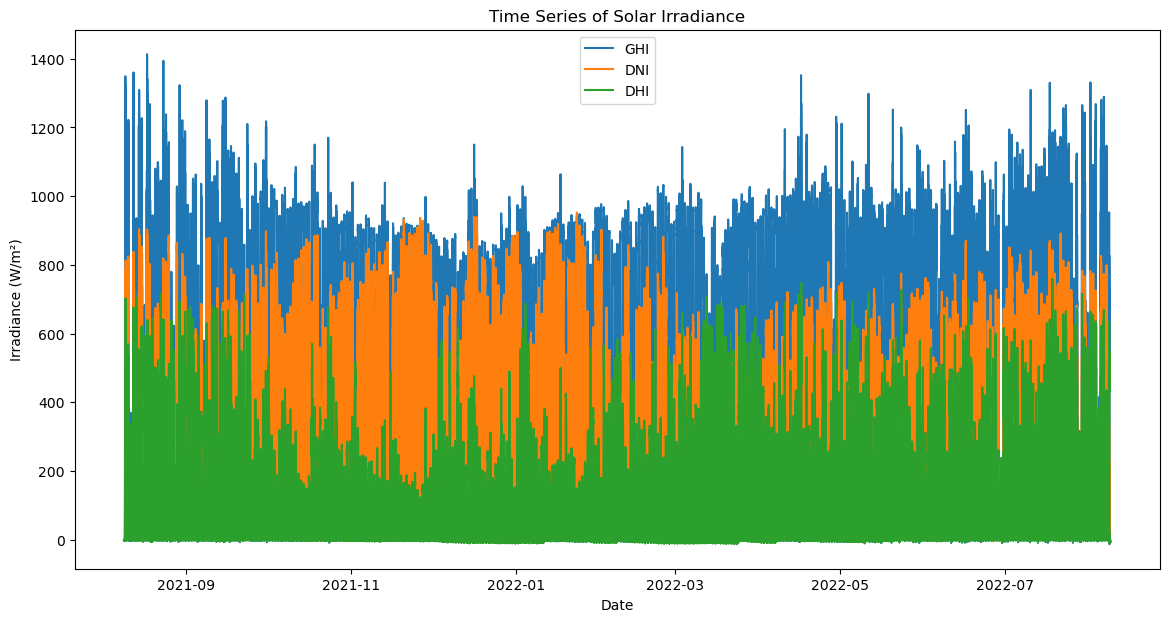

In [22]:
# Visualize trends over time for columns such as GHI, DNI, DHI, and Tamb.
# Plotting time series data
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'])
plt.figure(figsize=(14, 7))
plt.plot(data1['Timestamp'], data1['GHI'], label='GHI')
plt.plot(data1['Timestamp'], data1['DNI'], label='DNI')
plt.plot(data1['Timestamp'], data1['DHI'], label='DHI')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.title('Time Series of Solar Irradiance')
plt.legend()
plt.show()
